# Animation of the training process in real time
### Animation of the training process. You will see how this simple model try to fit data overtime. The data  represents a sine wave with noise. 


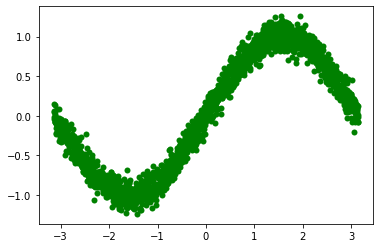

In [8]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from IPython import display

m = 2000
np.random.seed(42)

x = np.linspace(-math.pi, math.pi, m)
y = np.sin(x)+np.random.randn(m)/10 # add a bit of noise to y
y = y.reshape(m,1)


fig, ax = plt.subplots()
plt.scatter(x,y,color='green',linewidths=0)

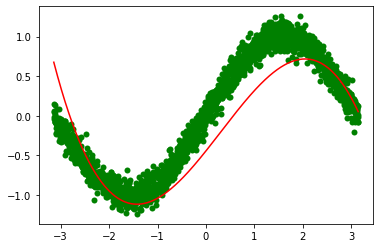

In [ ]:
# init weight
# y_pred = w0*1 + w1*x + w2*x^2 + w3*x^3
W=np.random.randn(4,1)
X = np.array([np.ones(m),x,x**2,x**3]).transpose()


# update weight with rsmprop
learning_rate = 5e-6
beta = 0.9
V_grad_W = np.zeros((4,1))

fig, ax = plt.subplots()
ax.scatter(x,y,color='green',linewidths=0)
ln, = ax.plot(x,y,color='red')

for t in range(1,100):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = X.dot(W)
    
    # loss 
    Loss = (y_pred-y)**2
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    # dy = dLoss/dy
    grad_y_pred = 2.0 *(y_pred - y)
    # dy.X
    grad_W = np.dot(X.transpose(),grad_y_pred)
    
    # implement exponential weighted averages (appoximation of moving average) or rsmprop
    V_grad_W = (beta*V_grad_W + (1-beta)*grad_W)
    # Update weights
    W = (W-learning_rate*V_grad_W)
    ln.set_data(x,y_pred)

    display.clear_output(wait=True)
    display.display(fig)

